# Testes de Software - Trabalho Final

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from glob import glob
import os

### Setup config

In [2]:
ROOT_DIR = "../"

# Where to save the figures
IMAGES_PATH = os.path.join(ROOT_DIR, "img")
os.makedirs(IMAGES_PATH, exist_ok=True)

# Where the datasets are
DATA_PATH = os.path.join(ROOT_DIR,"data")
os.makedirs(DATA_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Graph style

In [3]:
%config InlineBackend.figure_format ='retina'

sns.set(font_scale=1.5)

sns.set_context("paper")

sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.family': ['sans-serif'],
               'axes.edgecolor' : 'white'})

pd.set_option("display.max_rows", None, "display.max_columns", None)

### Data

#### Columns description:

- n_p_s_f = Number of profiling samples in this function
- p_p_s_f = Percentage of profiling samples in this function
- p_p_s_f_p = Percentage of profiling samples in the functions printed so far
- n_p_s_f_c = Number of profiling samples in this function and its callees
- p_p_s_f_c = Percentage of profiling samples in this function and its callees
- f_n = Function name

In [4]:
data = pd.read_fwf('../data/gcc/cpugcc_r-gccpp.txt',
                   header=None,
                   names = ['n_p_s_f', 'p_p_s_f', 'p_p_s_f_p', 'n_p_s_f_c', 'p_p_s_f_c', 'f_n'])

In [5]:
data.tail()

,n_p_s_f,p_p_s_f,p_p_s_f_p,n_p_s_f_c,p_p_s_f_c,f_n
3310,0,0.0%,00.0%,6,0.1%,vrp_visit_stmt
3311,0,0.0%,00.0%,2,0.0%,walk_gimple_seq
3312,0,0.0%,00.0%,37,0.6%,walk_non_aliased_vuses
3313,0,0.0%,00.0%,2,0.0%,wrap_constant (inline)
3314,0,0.0%,00.0%,3,0.0%,write_dependence_p (inline)


### Data processing

In [6]:
data['p_p_s_f'] = data['p_p_s_f'].str.replace('%', '')
data['p_p_s_f_p'] = data['p_p_s_f_p'].str.replace('%', '')
data['p_p_s_f_c'] = data['p_p_s_f_c'].str.replace('%', '')

In [7]:
data['p_p_s_f'] = pd.to_numeric(data['p_p_s_f'])
data['p_p_s_f_p'] = pd.to_numeric(data['p_p_s_f_p'])
data['p_p_s_f_c'] = pd.to_numeric(data['p_p_s_f_c'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315 entries, 0 to 3314
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   n_p_s_f    3315 non-null   int64  
 1   p_p_s_f    3315 non-null   float64
 2   p_p_s_f_p  3315 non-null   float64
 3   n_p_s_f_c  3315 non-null   int64  
 4   p_p_s_f_c  3315 non-null   float64
 5   f_n        3315 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 155.5+ KB


In [9]:
data['t_i_f'] = data['n_p_s_f'] / data['n_p_s_f'].sum()

In [10]:
data = data.sort_values(by=['t_i_f'])

In [11]:
data['c_t'] = data['t_i_f'].cumsum()

In [12]:
data

,n_p_s_f,p_p_s_f,p_p_s_f_p,n_p_s_f_c,p_p_s_f_c,f_n,t_i_f,c_t
1657,0,0.0,0.0,2,0.0,build_conflicts (inline),0.000000,0.000000
2204,0,0.0,0.0,2,0.0,find_interesting_uses,0.000000,0.000000
2205,0,0.0,0.0,2,0.0,find_interesting_uses_address,0.000000,0.000000
2206,0,0.0,0.0,2,0.0,find_interesting_uses_stmt,0.000000,0.000000
2207,0,0.0,0.0,3,0.0,find_invariant_insn (inline),0.000000,0.000000
2208,0,0.0,0.0,74,1.2,find_invariants (inline),0.000000,0.000000
2209,0,0.0,0.0,6,0.1,find_invariants_bb (inline),0.000000,0.000000
2210,0,0.0,0.0,6,0.1,find_invariants_body (inline),0.000000,0.000000
2211,0,0.0,0.0,6,0.1,find_invariants_insn (inline),0.000000,0.000000
2212,0,0.0,0.0,5,0.1,find_leader_in_sets (inline),0.000000,0.000000


### Analisys

In [13]:
cond_1 = (data['p_p_s_f'] > 1)
cond_2 = (data['p_p_s_f'] <= 1) & (data['p_p_s_f'] > .1)
cond_3 = data['p_p_s_f'] <= .1

print("> 1%: " + str(len(data[cond_1])))
print("0.1% < X =< 1%: " + str(len(data[cond_2])))
print("=< 0.1% : " + str(len(data[cond_3])))
print("Total # of rows: " + str(len(data)))

> 1%: 6
0.1% < X =< 1%: 118
=< 0.1% : 3191
Total # of rows: 3315


#### Bar plot

Saving figure bar_chart


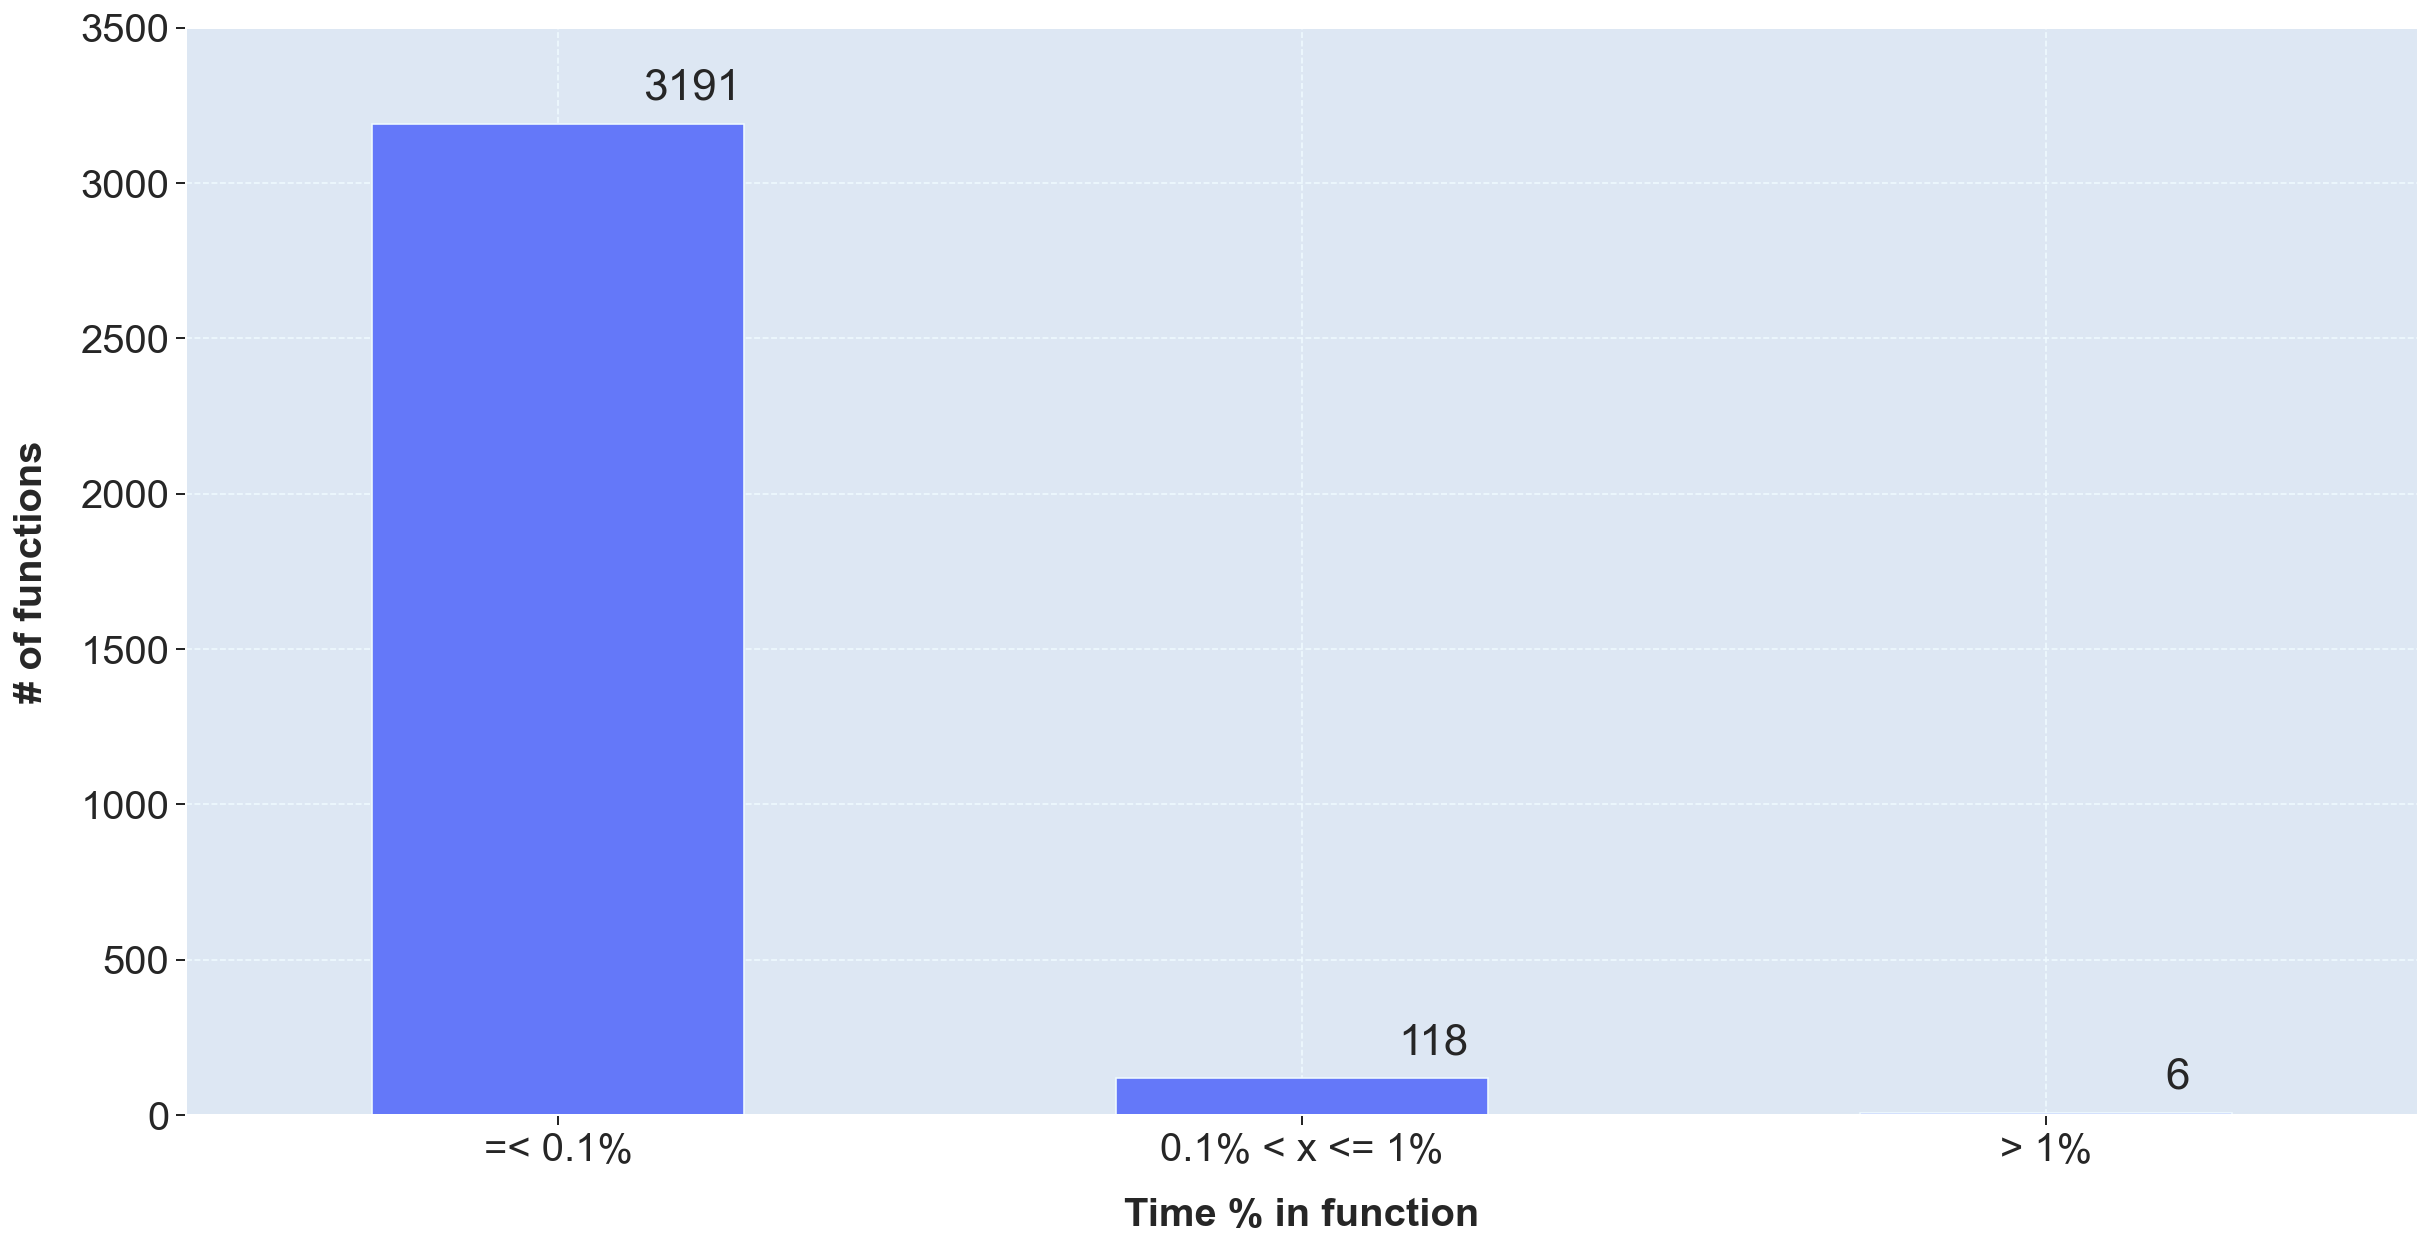

In [14]:
out = pd.cut(data['p_p_s_f'], bins=[0, 0.1, 1, 5], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="#636ef9", figsize=(20, 10))

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.xlabel("Time % in function",
           fontsize=20,
           labelpad=15,
           weight= 'bold')

plt.ylabel("# of functions",
           fontsize=20,
           labelpad=15,
           weight= 'bold')

x = [0, 1, 2]
x_label = ['=< 0.1%', '0.1% < x <= 1%', '> 1%']
plt.xticks(x, x_label)

plt.axhspan(0, 3500, facecolor='#6dd5ff', alpha=0.1)

plt.ylim(0, 3500)

plt.text(x = 0.115, y = out.value_counts().tolist()[0]+80, s = out.value_counts().tolist()[0], size = 22)
plt.text(x = 1.13, y = out.value_counts().tolist()[1]+80, s = out.value_counts().tolist()[1], size = 22)
plt.text(x = 2.16, y = out.value_counts().tolist()[2]+80, s = out.value_counts().tolist()[2], size = 22)

save_fig("bar_chart")

plt.show()

#### Pie chart

Saving figure pie_chart


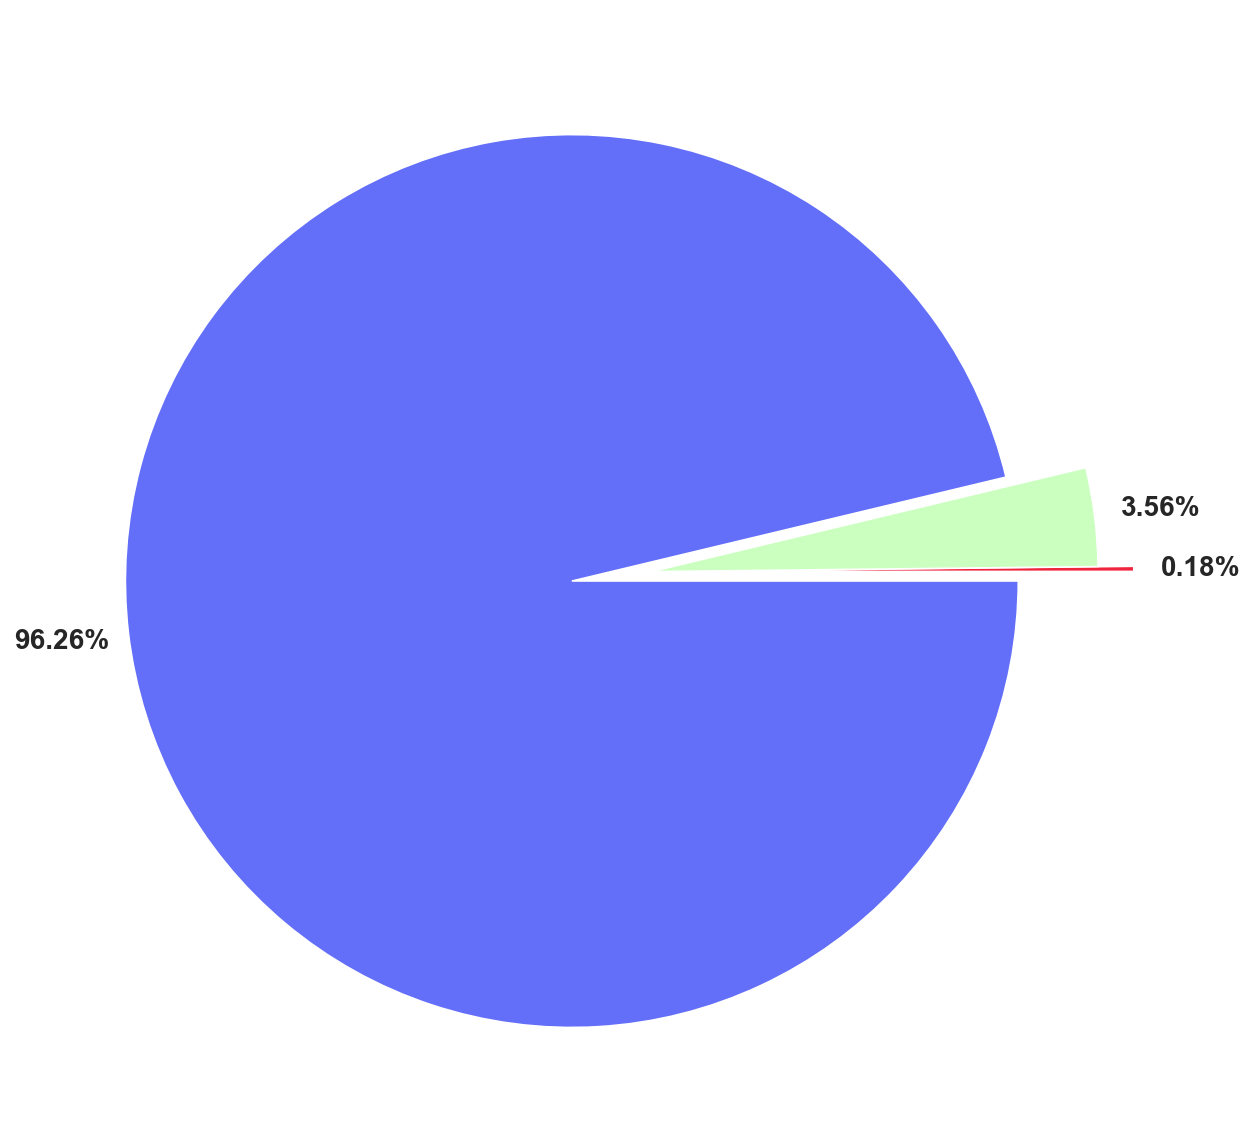

In [15]:
fig = plt.figure(figsize=(10, 15))

values = [len(data[cond_1]),
          len(data[cond_2]),
          len(data[cond_3])]

explode = (0.08, 0, 0.18)
colors=['#ef233c', '#caffbf', '#636ef9']

plt.pie(x=values,
        autopct="%.2f%%",
        pctdistance=1.15,
        explode=explode,
        colors=colors,
        textprops={'fontsize': 14,
                   'weight': 'bold'})

save_fig("pie_chart")

plt.show()

#### Step chart

Saving figure step_chart


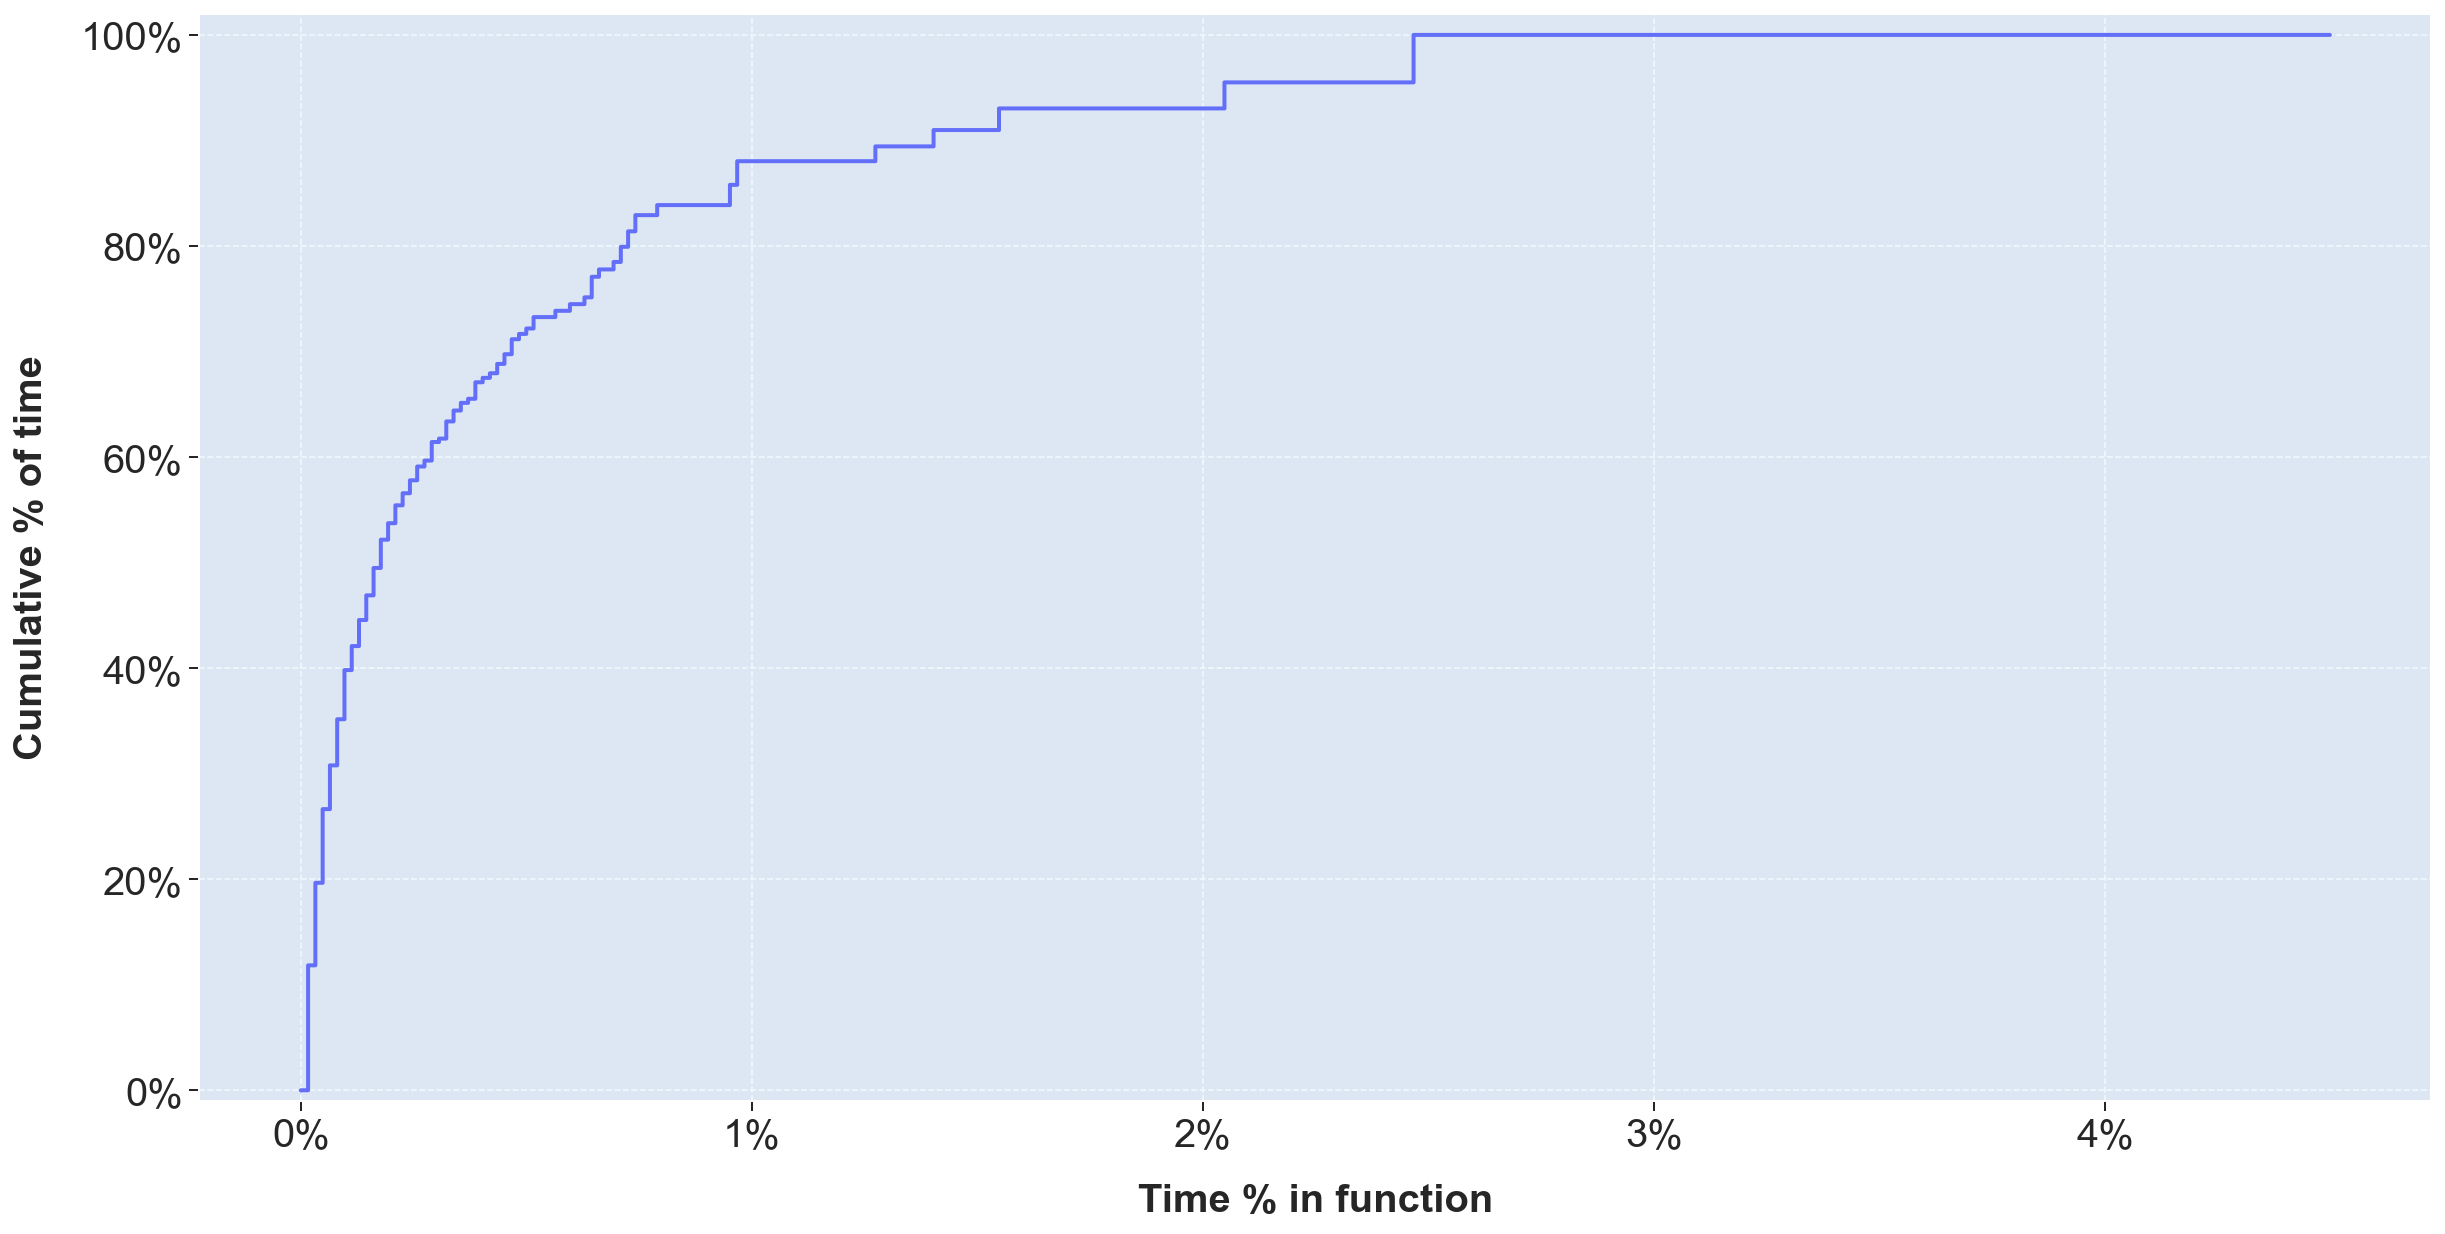

In [16]:
fig = plt.figure(figsize=(20, 10))

plt.step(data['t_i_f'], data['c_t'], linewidth=2.0, c="#636ef9")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.xlabel("Time % in function",
           fontsize=20,
           labelpad=15,
           weight= 'bold')

plt.ylabel("Cumulative % of time",
           fontsize=20,
           labelpad=15,
           weight= 'bold')

x = [0.00, 0.01, 0.02, 0.03, 0.04]
x_label = ['0%', '1%', '2%', '3%', '4%']
plt.xticks(x, x_label)

y = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_label = ['0%', '20%', '40%', '60%', '80%', '100%']
plt.yticks(y, y_label)

plt.axhspan(-0.01, 1.02, facecolor='#6dd5ff', alpha=0.1)

plt.ylim(-0.01, 1.02)

save_fig("step_chart")

plt.show()

#### Functions that can possibly be optimized

In [17]:
data[cond_1]

,n_p_s_f,p_p_s_f,p_p_s_f_p,n_p_s_f_c,p_p_s_f_c,f_n,t_i_f,c_t
5,79,1.3,13.2,164,2.6,htab_find_slot_with_hash,0.012738,0.880361
4,87,1.4,12.0,147,2.4,df_note_bb_compute (inline),0.014028,0.894389
3,96,1.5,10.6,96,1.5,bmp_iter_set (inline),0.015479,0.909868
2,127,2.0,9.0,127,2.0,bitmap_find_bit (inline),0.020477,0.930345
1,153,2.5,7.0,153,2.5,__nss_database_lookup,0.024669,0.955015
0,279,4.5,4.5,288,4.6,pthread_attr_setschedparam,0.044985,1.000000


### Appendix

#### Choosing SPEC dataset

In [18]:
data1 = pd.read_fwf('../data/gcc/cpugcc_r-gccpp.txt',
                    header=None,
                    names = ['n_p_s_f', 'p_p_s_f', 'p_p_s_f_p', 'n_p_s_f_c', 'p_p_s_f_c', 'f_n'])
data2 = pd.read_fwf('../data/gcc/cpugcc_r-gccsmall.txt',
                    header=None,
                    names = ['n_p_s_f', 'p_p_s_f', 'p_p_s_f_p', 'n_p_s_f_c', 'p_p_s_f_c', 'f_n'])
data3 = pd.read_fwf('../data/gcc/cpugcc_r-ref.txt',
                    header=None,
                    names = ['n_p_s_f', 'p_p_s_f', 'p_p_s_f_p', 'n_p_s_f_c', 'p_p_s_f_c', 'f_n'])

In [19]:
print('cpugcc_r-gccpp.txt size (# of functions): ' + str(len(data1)))
print('cpugcc_r-gccsmall.txt size (# of functions): ' + str(len(data2)))
print('cpugcc_r-ref.txt size (# of functions): ' + str(len(data3)))

cpugcc_r-gccpp.txt size (# of functions): 3315
cpugcc_r-gccsmall.txt size (# of functions): 2800
cpugcc_r-ref.txt size (# of functions): 2134
